In [54]:
%load_ext dotenv
%dotenv

In [2]:
import pandas as pd
import os
import plotly.express as px
import folium

# Location Recommender

## Load Data

In [3]:
path_to_json = '../data'
json_files = [pos_json for pos_json in os.listdir(path_to_json) if pos_json.endswith('.json')]
json_files

['yelp_academic_dataset_checkin.json',
 'yelp_academic_dataset_tip.json',
 'yelp_academic_dataset_review.json',
 'yelp_academic_dataset_business.json',
 'yelp_academic_dataset_user.json']

In [4]:
business_df = pd.read_json('../data/yelp_academic_dataset_business.json', lines=True)
business_df.head()

business_id                      name  \
0  Pns2l4eNsfO8kk83dixA6A  Abby Rappoport, LAC, CMQ   
1  mpf3x-BjTdTEA3yCZrAYPw             The UPS Store   
2  tUFrWirKiKi_TAnsVWINQQ                    Target   
3  MTSW4McQd7CbVtyjqoe9mw        St Honore Pastries   
4  mWMc6_wTdE0EUBKIGXDVfA  Perkiomen Valley Brewery   

                           address           city state postal_code  \
0           1616 Chapala St, Ste 2  Santa Barbara    CA       93101   
1  87 Grasso Plaza Shopping Center         Affton    MO       63123   
2             5255 E Broadway Blvd         Tucson    AZ       85711   
3                      935 Race St   Philadelphia    PA       19107   
4                    101 Walnut St     Green Lane    PA       18054   

    latitude   longitude  stars  review_count  is_open  \
0  34.426679 -119.711197    5.0             7        0   
1  38.551126  -90.335695    3.0            15        1   
2  32.223236 -110.880452    3.5            22        0   
3  39.955505  -75.155564    4.0            80        1   
4  40.338183  -75.471659    4.5            13        1   

                                          attributes  \
0                      {'ByAppointmentOnly': 'True'}   
1             {'BusinessAcceptsCreditCards': 'True'}   
2  {'BikeParking': 'True', 'BusinessAcceptsCredit...   
3  {'RestaurantsDelivery': 'False', 'OutdoorSeati...   
4  {'BusinessAcceptsCreditCards': 'True', 'Wheelc...   

                                          categories  \
0  Doctors, Traditional Chinese Medicine, Naturop...   
1  Shipping Centers, Local Services, Notaries, Ma...   
2  Department Stores, Shopping, Fashion, Home & G...   
3  Restaurants, Food, Bubble Tea, Coffee & Tea, B...   
4                          Brewpubs, Breweries, Food   

                                               hours  
0                                               None  
1  {'Monday': '0:0-0:0', 'Tuesday': '8:0-18:30', ...  
2  {'Monday': '8:0-22:0', 'Tuesday': '8:0-22:0', ...  
3  {'Monday': '7:0-20:0', 'Tuesday': '7:0-20:0', ...  
4  {'Wednesday': '14:0-22:0', 'Thursday': '16:0-2...

## Philadelphia Test

In [19]:
open_business_df = business_df[business_df['is_open'] == 1]
philly_df = open_business_df[open_business_df['city']=='Philadelphia'].dropna()
philly_restaurants_df = philly_df[philly_df['categories'].str.contains("Restaurants")]
philly_restaurants_df.head()

business_id                name             address  \
3   MTSW4McQd7CbVtyjqoe9mw  St Honore Pastries         935 Race St   
15  MUTTqe8uqyMdBl186RmNeA            Tuna Bar         205 Race St   
19  ROeacJQwBeh05Rqg7F6TCg                 BAP       1224 South St   
35  aPNXGTDkf-4bjhyMBQxqpQ          Craft Hall  901 N Delaware Ave   
82  ppFCk9aQkM338Rgwpl2F5A                Wawa    3604 Chestnut St   

            city state postal_code   latitude  longitude  stars  review_count  \
3   Philadelphia    PA       19107  39.955505 -75.155564    4.0            80   
15  Philadelphia    PA       19106  39.953949 -75.143226    4.0           245   
19  Philadelphia    PA       19147  39.943223 -75.162568    4.5           205   
35  Philadelphia    PA       19123  39.962582 -75.135657    3.5            65   
82  Philadelphia    PA       19104  39.954573 -75.194894    3.0            56   

    is_open                                         attributes  \
3         1  {'RestaurantsDelivery': 'False', 'OutdoorSeati...   
15        1  {'RestaurantsReservations': 'True', 'Restauran...   
19        1  {'NoiseLevel': 'u'quiet'', 'GoodForMeal': '{'d...   
35        1  {'OutdoorSeating': 'True', 'RestaurantsPriceRa...   
82        1  {'Alcohol': 'u'none'', 'RestaurantsGoodForGrou...   

                                           categories  \
3   Restaurants, Food, Bubble Tea, Coffee & Tea, B...   
15                  Sushi Bars, Restaurants, Japanese   
19                                Korean, Restaurants   
35  Eatertainment, Arts & Entertainment, Brewpubs,...   
82  Restaurants, Automotive, Delis, Gas Stations, ...   

                                                hours  
3   {'Monday': '7:0-20:0', 'Tuesday': '7:0-20:0', ...  
15  {'Tuesday': '13:30-22:0', 'Wednesday': '13:30-...  
19  {'Monday': '11:30-20:30', 'Tuesday': '11:30-20...  
35  {'Monday': '0:0-0:0', 'Wednesday': '16:0-22:0'...  
82  {'Monday': '0:0-0:0', 'Tuesday': '0:0-0:0', 'W...

### Plot Map

In [21]:
philly_map = folium.Map(location=[philly_restaurants_df.latitude.mean(), 
                           philly_restaurants_df.longitude.mean()], 
                            zoom_start=14, control_scale=True)
philly_map

In [22]:
for index, location_info in philly_restaurants_df.iterrows():
    folium.Marker([philly_restaurants_df.loc[index,"latitude"], philly_restaurants_df.loc[index,"longitude"]], popup=location_info["name"]).add_to(philly_map)

In [23]:
philly_map

### Clustering

In [37]:
from sklearn.cluster import KMeans
inertias = []
for k in range(1,15):
    knn = KMeans(n_clusters=k)
    knn.fit(philly_restaurants_df[['latitude','longitude']])
    inertias.append(knn.inertia_)

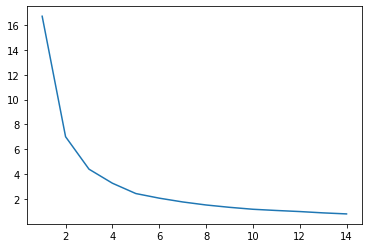

In [40]:
import matplotlib.pyplot as plt
plt.plot(range(1,15), inertias)

In [57]:
knn = KMeans(n_clusters=15)
knn.fit(philly_restaurants_df[['latitude','longitude']])

KMeans(n_clusters=15)

In [58]:
philly_restaurants_df['cluster'] = knn.labels_

/var/folders/3j/qs3cksz548qf472tstpwx5r00000gn/T/ipykernel_47744/4078027847.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [59]:
philly_restaurants_df

business_id                           name  \
3       MTSW4McQd7CbVtyjqoe9mw             St Honore Pastries   
15      MUTTqe8uqyMdBl186RmNeA                       Tuna Bar   
19      ROeacJQwBeh05Rqg7F6TCg                            BAP   
35      aPNXGTDkf-4bjhyMBQxqpQ                     Craft Hall   
82      ppFCk9aQkM338Rgwpl2F5A                           Wawa   
...                        ...                            ...   
150178  auwFZzfhe2pvFw43OfsAfw                 Stina Pizzeria   
150210  K1SsvIPfFcHniNSPc3IG7g                   Flip-N-Pizza   
150237  OfRbGvHn-nAnQMqNxiIpcA                  Grilly Cheese   
150306  wVxXRFf10zTTAs11nr4xeA                   PrimoHoagies   
150336  WnT9NIzQgLlILjPT0kEcsQ  Adelita Taqueria & Restaurant   

                   address          city state postal_code   latitude  \
3              935 Race St  Philadelphia    PA       19107  39.955505   
15             205 Race St  Philadelphia    PA       19106  39.953949   
19           1224 South St  Philadelphia    PA       19147  39.943223   
35      901 N Delaware Ave  Philadelphia    PA       19123  39.962582   
82        3604 Chestnut St  Philadelphia    PA       19104  39.954573   
...                    ...           ...   ...         ...        ...   
150178     1705 Snyder Ave  Philadelphia    PA       19145  39.925205   
150210   1308 W Girard Ave  Philadelphia    PA       19123  39.970720   
150237        3306 Arch St  Philadelphia    PA       19104  39.957447   
150306      6024 Ridge Ave  Philadelphia    PA       19128  40.032483   
150336       1108 S 9th St  Philadelphia    PA       19147  39.935982   

        longitude  stars  review_count  is_open  \
3      -75.155564    4.0            80        1   
15     -75.143226    4.0           245        1   
19     -75.162568    4.5           205        1   
35     -75.135657    3.5            65        1   
82     -75.194894    3.0            56        1   
...           ...    ...           ...      ...   
150178 -75.174728    4.5           112        1   
150210 -75.157752    4.0            16        1   
150237 -75.189916    3.0             5        1   
150306 -75.214430    3.0            55        1   
150336 -75.158665    4.5            35        1   

                                               attributes  \
3       {'RestaurantsDelivery': 'False', 'OutdoorSeati...   
15      {'RestaurantsReservations': 'True', 'Restauran...   
19      {'NoiseLevel': 'u'quiet'', 'GoodForMeal': '{'d...   
35      {'OutdoorSeating': 'True', 'RestaurantsPriceRa...   
82      {'Alcohol': 'u'none'', 'RestaurantsGoodForGrou...   
...                                                   ...   
150178  {'DogsAllowed': 'False', 'RestaurantsTakeOut':...   
150210  {'WiFi': 'u'no'', 'BYOB': 'False', 'Restaurant...   
150237  {'BikeParking': 'True', 'WheelchairAccessible'...   
150306  {'NoiseLevel': 'u'average'', 'RestaurantsTakeO...   
150336  {'WheelchairAccessible': 'False', 'Restaurants...   

                                               categories  \
3       Restaurants, Food, Bubble Tea, Coffee & Tea, B...   
15                      Sushi Bars, Restaurants, Japanese   
19                                    Korean, Restaurants   
35      Eatertainment, Arts & Entertainment, Brewpubs,...   
82      Restaurants, Automotive, Delis, Gas Stations, ...   
...                                                   ...   
150178                  Pizza, Restaurants, Mediterranean   
150210  Restaurants, American (Traditional), Chicken W...   
150237  Specialty Food, Event Planning & Services, Res...   
150306  Restaurants, Specialty Food, Food, Sandwiches,...   
150336                               Restaurants, Mexican   

                                                    hours  cluster  
3       {'Monday': '7:0-20:0', 'Tuesday': '7:0-20:0', ...       14  
15      {'Tuesday': '13:30-22:0', 'Wednesday': '13:30-...       13  
19      {'Monday': '11:30-20:30', 'Tuesday': '11:30-20...       14  
35    

In [61]:
MAPBOX_KEY = os.environ.get("MAPBOX_KEY")
px.set_mapbox_access_token(MAPBOX_KEY)
fig = px.scatter_mapbox(philly_restaurants_df, lat="latitude", lon='longitude', color='cluster',hover_data= ['name', 'latitude', 'longitude'], zoom=10, width=1000, height=800)
fig.update_layout(mapbox_style="dark")
fig.show()